# Loan Repayment Prediciton - Keras API Project

## The Data

I will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains the label.

### Data Overview

----
-----


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Importing the neccessary modules

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
#function that returns the descriptions of columns given as input
def feat_info(col_name):
    print(data_info.loc[col_name]['Description']) 

## Loading the data and other imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
df.shape

(396030, 27)


-----
------

#  Exploratory Data Analysis



----

**Creating a countplot of the loan status**

[Text(0, 0, '318357'), Text(0, 0, '77673')]

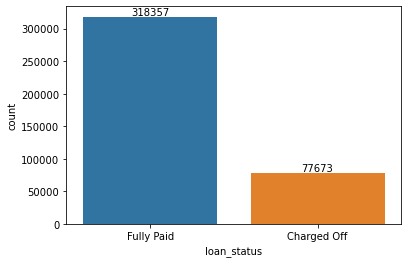

In [8]:
ax=sns.countplot(df.loan_status)
abs_values = df['loan_status'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

**Creating a histogram of the loan_amnt column.**

<AxesSubplot:xlabel='loan_amnt'>

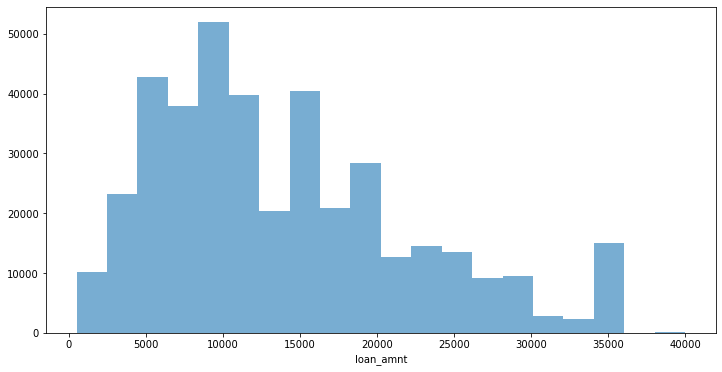

In [9]:
plt.figure(figsize=(12,6))
sns.distplot(df.loan_amnt,kde=False,bins=20,hist_kws={'alpha':0.6})

**Calculating the correlation between all continuous numeric variables using .corr() method.**

In [10]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Visualizing the correlations using a heatmap.**


<AxesSubplot:>

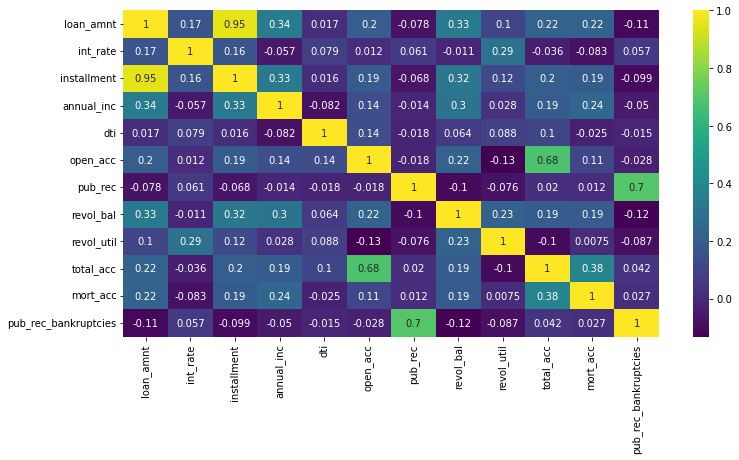

In [11]:
# CODE HERE
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

**There is almost perfect correlation with the "installment" feature. Printing out their descriptions and performing a scatterplot between them. ***

In [12]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [13]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

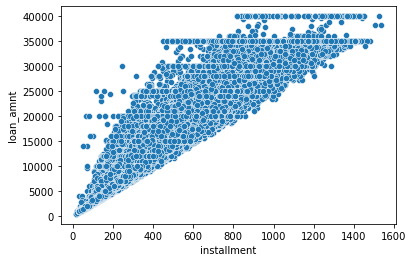

In [14]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

**The scatterplot indicates a strong correlation between installment and loan amount. This is obvious since larger loan amounts would demand larger installments from the borrower.**

**Creating a boxplot showing the relationship between the loan_status and the Loan Amount.**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

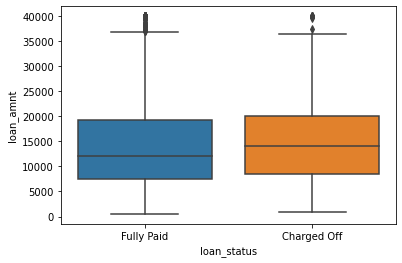

In [15]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [16]:
df.groupby('loan_status').median()['loan_amnt']

loan_status
Charged Off    14000.0
Fully Paid     12000.0
Name: loan_amnt, dtype: float64

**As indicated by the boxplot, the median loan amount for the loans that were charged off is slightly higher than that of the loans that were fully paid.**

**Calculating the summary statistics for the loan amount, grouped by the loan_status.**

In [17]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. Finding the unique possible grades and subgrades.**

In [18]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [19]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

**Creating a countplot per grade. Setting the hue to the loan_status label.**

<AxesSubplot:xlabel='grade', ylabel='count'>

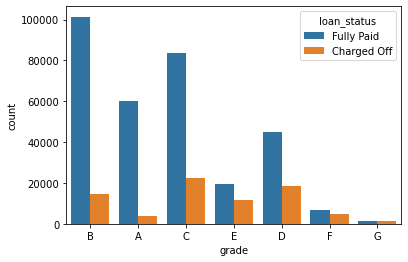

In [20]:
sns.countplot(x='grade',data=df,hue='loan_status')

**Displaying a count plot per subgrade with hue="loan_status"**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

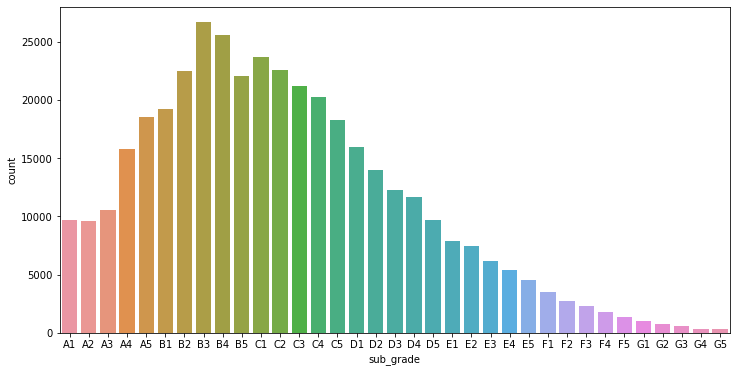

In [21]:
plt.figure(figsize=(12,6))
sg_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=sg_order)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

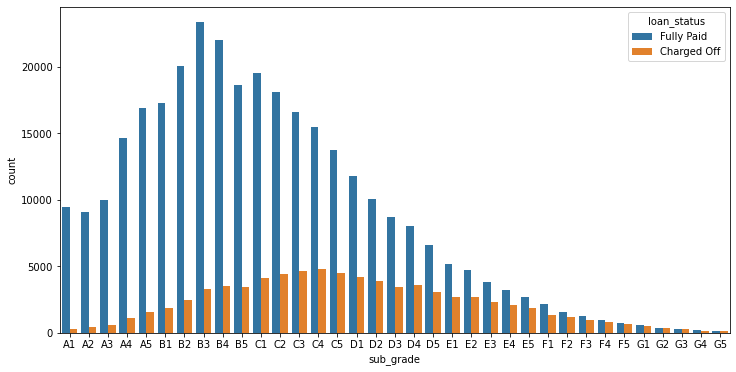

In [22]:
plt.figure(figsize=(12,6))
sg_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=sg_order,hue='loan_status')

**It looks like F and G subgrades don't get paid back that often. Lets isloate those and recreate the countplot just for those subgrades.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

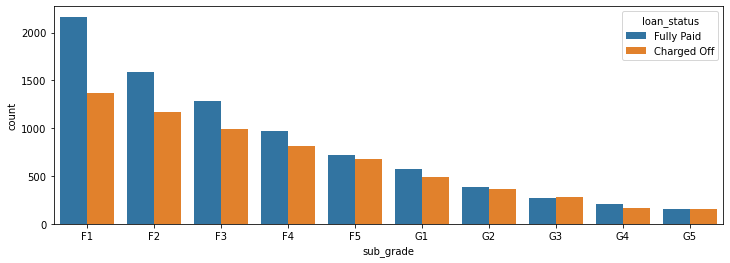

In [23]:
plt.figure(figsize=(12,4))
s_order=sorted(df[(df['grade']=='F')|(df['grade']=='G')]['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df[(df['grade']=='F')|(df['grade']=='G')],order=s_order,hue='loan_status')

**Creating a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [24]:
df_loan_repaid_map={"Fully Paid":1,"Charged Off":0}
df['loan_repaid']=df['loan_status'].map(df_loan_repaid_map)
df[['loan_status','loan_repaid']].head(10)

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
5,Fully Paid,1
6,Fully Paid,1
7,Fully Paid,1
8,Fully Paid,1
9,Fully Paid,1


**Creating a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

<AxesSubplot:>

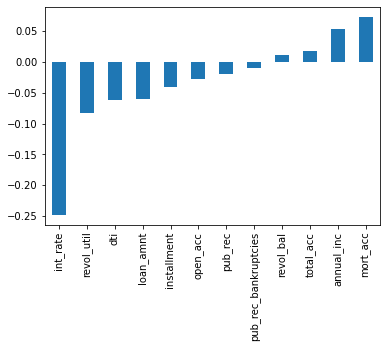

In [25]:
df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

---
---
# Data PreProcessing

**Removing and filling any missing data. Removing unnecessary or repetitive features. Converting categorical string features to dummy variables.**



In [26]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

# Missing Data


**length of the dataframe**

In [27]:
no_rows=df.shape[0]
no_rows

396030

**Creating a Series that displays the total count of missing values per column.**

In [28]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Converting this Series to be in term of percentage of the total DataFrame**

In [29]:
df.isnull().sum()/no_rows*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Examining emp_title and emp_length to see whether it will be okay to drop them. Printing out their feature information using the feat_info() function from the top of this notebook.**

In [30]:
print(feat_info('emp_title'))
print('\n')
print(feat_info('emp_length'))

The job title supplied by the Borrower when applying for the loan.*
None


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


**Number of unique employment job titles**

In [31]:
len(df['emp_title'].unique())

173106

In [32]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**There are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [33]:
df=df.drop('emp_title',axis=1)

**Creating a count plot of the emp_length feature column.**

In [34]:
s_order=df['emp_length'].value_counts(ascending=False).index

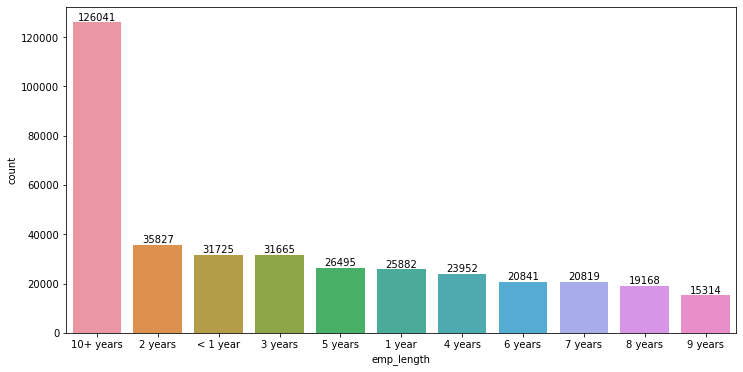

In [35]:
plt.figure(figsize=(12,6))
ax=sns.countplot(df['emp_length'],order=s_order)
for i in ax.containers:
    ax.bar_label(i)

**Plotting out the countplot with a hue separating Fully Paid vs Charged Off**

<AxesSubplot:xlabel='emp_length', ylabel='count'>

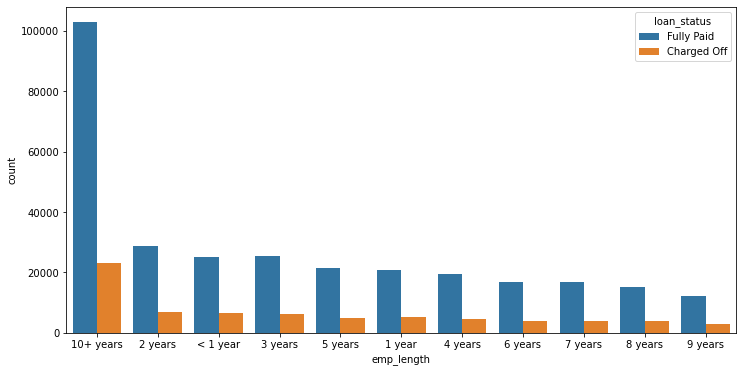

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data=df,order=s_order,hue='loan_status')

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [37]:
tot_cnt=df.groupby('emp_length').count()['loan_repaid']
tot_cnt

emp_length
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: loan_repaid, dtype: int64

<AxesSubplot:xlabel='emp_length'>

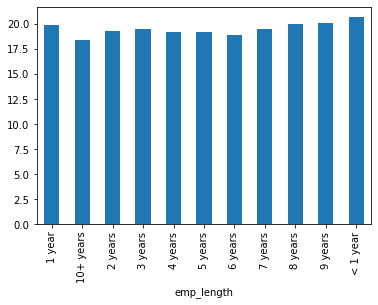

In [38]:
(df[df['loan_repaid']==0].groupby('emp_length').count()['loan_repaid']/tot_cnt*100).plot(kind='bar')

**Charging off rates are extremely similar across all employment lengths.Drop the emp_length column.**

In [39]:
df=df.drop('emp_length',axis=1)

**Revisiting the DataFrame to see what feature columns still have missing data.**

In [40]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Reviewing the title column vs the purpose column.**

In [41]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [42]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

**The title column is simply a string subcategory/description of the purpose column. Dropping the title column.**

In [43]:
df=df.drop('title',axis=1)




---
**Finding out what the mort_acc feature represents**

In [44]:
feat_info('mort_acc')

Number of mortgage accounts.


**Creating a value_counts of the mort_acc column.**

In [45]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**Let's review the other columsn to see which most highly correlates to mort_acc**

In [46]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc , this makes sense. Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [47]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [48]:
total_acc_mean=df.groupby('total_acc').mean()['mort_acc']

In [49]:
total_acc_mean[3]

0.05202312138728324

**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.**


In [50]:
def replace_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_mean[total_acc]
    else:
        return mort_acc

In [51]:
df['mort_acc']=df.apply(lambda x:replace_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [52]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Removing the rows that are missing those values in those columns with dropna().**

In [53]:
df=df.dropna()

In [54]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables


**List all the columns that are currently non-numeric.**


In [55]:
mylist = list(df.select_dtypes(include=['object']).columns)
mylist

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**Converting the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [56]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [57]:
def term_embd(x):
    return int(x[0:3])

In [58]:
df['term']=df['term'].apply(lambda x:term_embd(x))


### grade feature

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [59]:
df.drop('grade',axis=1)

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,Fully Paid,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


**Converting the subgrade into dummy variables. Then concatenate these new columns to the original dataframe.**

In [60]:
dummy_sub_grade=pd.get_dummies(df['sub_grade'])

In [61]:
df=pd.concat([df.drop('sub_grade',axis=1),dummy_sub_grade],axis=1)

In [62]:
pd.set_option('display.max_columns',None)
df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,B,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### verification_status, application_type,initial_list_status,purpose 
**Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenating them with the original dataframe.**

In [63]:
ver_status=pd.get_dummies(df['verification_status'])
app_type=pd.get_dummies(df['application_type'])
inital_list_status=pd.get_dummies(df['purpose'])
df=df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

In [64]:
df=pd.concat([df,ver_status,app_type,inital_list_status],axis=1)

In [65]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', 'Not Verified', 'Source Verified', 'Verified', 'DIRECT_PAY',
       'INDIVIDUAL', 'JOINT', 'car', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'],
      dtype='object')

### home_ownership
**Reviewing the value_counts for the home_ownership column.**

In [66]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Converting these to dummy variables, but we replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then we concatenate them with the original dataframe.**

In [67]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [68]:
home_own_dummies=pd.get_dummies(df['home_ownership'])
df=pd.concat([df.drop('home_ownership',axis=1),home_own_dummies],axis=1)

### address
**feature engineering a zip code column from the address in the data set. Creating a column called 'zip_code' that extracts the zip code from the address column.**

In [69]:
df['Zip_code']=[str(i.split()[-1]) for i in df['address']]

**Now we make this zip_code column into dummy variables using pandas. Concatenatimg the result and dropping the original zip_code column along with dropping the address column.**

In [70]:
zip_code=pd.get_dummies(df['Zip_code'])

In [71]:
df=df.drop('Zip_code',axis=1)

In [72]:
df=pd.concat([df,zip_code],axis=1)

In [73]:
df=df.drop('address',axis=1)

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, dropping this feature.**

In [74]:
df=df.drop('issue_d',axis=1)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extracting the year from this feature and then converting it to a numeric feature. We set this new data to a feature column called 'earliest_cr_year'.Then we drop the earliest_cr_line feature.**

In [75]:
df['earliest_cr_line']=[int(i[-4:]) for i in df['earliest_cr_line']]

In [76]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [77]:
grades=pd.get_dummies(df['grade'])
df=pd.concat([df.drop('grade',axis=1),grades],axis=1)

## Train Test Split

**Importing train_test_split from sklearn.**

In [78]:
from sklearn.model_selection import train_test_split

**Dropping the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [79]:
df=df.drop('loan_status',axis=1)

**Setting X and y variables to the .values of the features and label.**

In [80]:
X=df.drop('loan_repaid',axis=1)
y=df['loan_repaid']

----
----

## Grabbing a Sample for Training Time

----
----

In [81]:
df = df.sample(frac=0.1,random_state=101)
print(len(df))

39522


**Performing a train/test split with test_size=0.2 and a random_state of 101.**

In [82]:
X=df.drop('loan_repaid',axis=1)
y=df['loan_repaid']

In [83]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**We use a MinMaxScaler to normalize the feature data X_train and X_test. We don't want data leakge from the test set so we only fit on the X_train data.**

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler=MinMaxScaler()

In [86]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Creating the Model

**Running the cell below to import the necessary Keras functions.**

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**Building a sequential model to be trained on the data.**

In [116]:
model=Sequential()

model.add(Dense(90,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(55,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

**Fitting the model to the training data for at least 25 epochs. Also adding in the validation data for later plotting.**

In [117]:
model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test,y_test))

Epoch 1/25
124/124 [==============================] - 3s 6ms/step - loss: 0.4288 - val_loss: 0.3004
Epoch 2/25
124/124 [==============================] - 1s 8ms/step - loss: 0.2966 - val_loss: 0.2747
Epoch 3/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2769 - val_loss: 0.2699
Epoch 4/25
124/124 [==============================] - 1s 12ms/step - loss: 0.2694 - val_loss: 0.2691
Epoch 5/25
124/124 [==============================] - 1s 8ms/step - loss: 0.2671 - val_loss: 0.2716
Epoch 6/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2647 - val_loss: 0.2687
Epoch 7/25
124/124 [==============================] - 1s 7ms/step - loss: 0.2632 - val_loss: 0.2686
Epoch 8/25
124/124 [==============================] - 1s 7ms/step - loss: 0.2625 - val_loss: 0.2674
Epoch 9/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2618 - val_loss: 0.2680
Epoch 10/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2593 - val_loss: 0.267

**Saving the model.**

In [90]:
from tensorflow.keras.models import load_model

In [91]:
model.save('sigmoid_classifier_model_1.h5')

# Evaluating Model Performance.

**Plotting out the validation loss versus the training loss.**

In [92]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

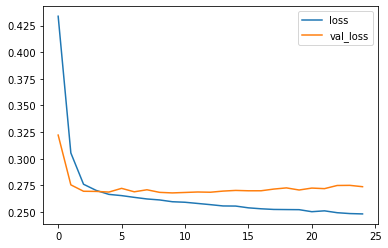

In [93]:
losses[['loss','val_loss']].plot()

**Creating predictions from the X_test set and displaying a classification report and confusion matrix for the X_test set.**

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
predictions = model.predict(X_test)

248/248 [==============================] - 1s 3ms/step


In [118]:
preds_1=np.where(predictions>0.5,1,0)

In [119]:
confusion_matrix(y_test,preds_1)

array([[ 726,  844],
       [  86, 6249]], dtype=int64)

In [120]:
print(classification_report(y_test,preds_1))

              precision    recall  f1-score   support

           0       0.89      0.46      0.61      1570
           1       0.88      0.99      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.89      0.72      0.77      7905
weighted avg       0.88      0.88      0.87      7905

